 # **Import of modules & colors**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import math
import json
import csv
import datetime as dt
import warnings
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from numpy import mean
from numpy import std
from typing import List

In [11]:
import seaborn as sns
sns.set(style="ticks")
sns.set_color_codes("colorblind")
sns.set(style="darkgrid")

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
color = [
'#000000',
'#000080',
'#0B0BFF',
'#98B5FF', 
'#BBC9DB',
'#797975',
'#0198E1',
'#00688B',
'#74CDDC', #nej
'#05EDFF',  
'#C9FFFF', 
'#8FBCBC',
'#457371',
'#28AE7B',
'#4DFFA5'
]

# **Load of data, new columns, datatypes and period of time definiton**

In [14]:
soubor = pd.read_csv('final.csv', encoding='utf-8', low_memory=False)

Datatypes

In [15]:
soubor['TIMETABLE_ARRIVAL_TIME'] = pd.to_datetime(soubor['TIMETABLE_ARRIVAL_TIME']).dt.time

In [16]:
soubor['ORIGIN_TIMESTAMP'] = pd.to_datetime(soubor['ORIGIN_TIMESTAMP']).dt.time

In [17]:
soubor['START_TIME'] = pd.to_datetime(soubor['START_TIME']).dt.time

New column with just the hour when the bus sent the location/was at the bus stop

In [18]:
for i, x in enumerate(soubor['ORIGIN_TIMESTAMP']):
    hour = x.hour
    minute = (math.floor(x.minute/10))*(1/6)
    soubor.loc[i,'HOUR'] = hour
    soubor.loc[i,'MINUTES'] = minute
    soubor.loc[i,'TIME'] = hour+minute

Inside covid period

In [19]:
inside_covid = soubor[(soubor['DATE'] <= '2020-05-17') & (~soubor['DAY_OF_WEEK'].isin(['Saturday','Sunday']))]

In [20]:
len(inside_covid['UNICORN'].unique())

178

# **Data from the 'time of a day' point of view (7-10:30 am during workweek)**

In [41]:
inside_covid_time = inside_covid[(inside_covid['TIME'] > 7.0)&(inside_covid['TIME'] < 10.3)]

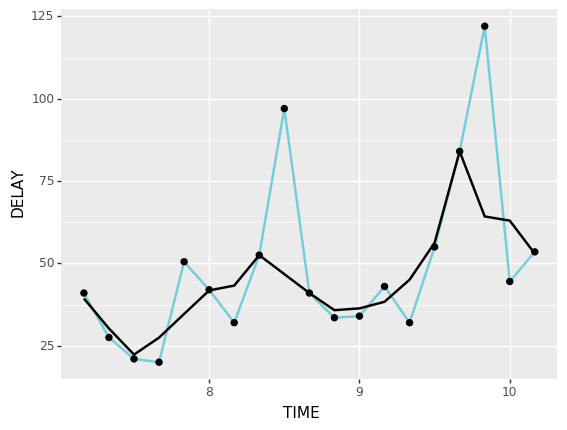

<ggplot: (-9223371916035598952)>

In [42]:
avg_delay_day = inside_covid_time.groupby(['TIME'])[['DELAY']].median()
avg_delay_day = avg_delay_day.reset_index()

plot_delay_day = ggplot(avg_delay_day, aes(x='TIME', y='DELAY')) + \
                    geom_line(color='#74CDDC',size=1) + \
                    geom_point(size=2) + \
                    scale_x_continuous(breaks=range(5, 13), minor_breaks=[]) + \
                    xlab("TIME") + \
                    ylab("DELAY") + \
stat_smooth(span = 0.3)
plot_delay_day

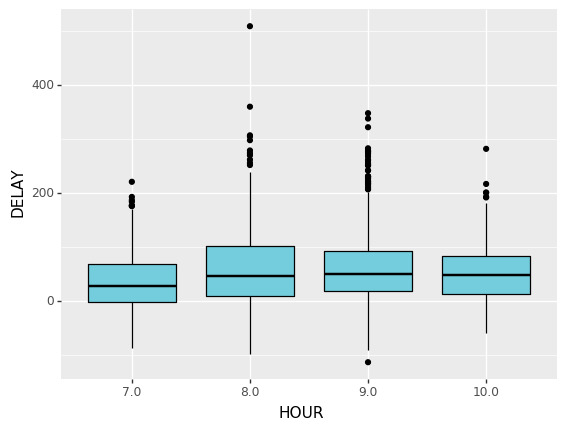

<ggplot: (-9223371916040608352)>

In [43]:
inside_covid_time['HOUR_cat'] = inside_covid_time['HOUR'].astype('category')

plotbox_delay_day = ggplot(inside_covid_time, aes(x='HOUR_cat', y='DELAY')) + \
            geom_boxplot(color='black', fill='#74CDDC') + \
            xlab("HOUR") + \
            ylab("DELAY")
plotbox_delay_day

In [44]:
inside_covid_time.groupby('TIME')['DELAY'].describe()

,count,mean,std,min,25%,50%,75%,max
TIME,,,,,,,,
7.166667,104.0,41.923077,51.759093,-81.0,8.50,41.0,76.25,155.0
7.333333,272.0,31.430147,56.179755,-87.0,-7.50,27.5,69.50,177.0
7.500000,231.0,32.311688,55.047235,-72.0,-4.00,21.0,59.00,193.0
7.666667,135.0,27.096296,47.491378,-71.0,-5.50,20.0,50.00,177.0
7.833333,118.0,53.737288,50.302407,-52.0,22.00,50.5,90.25,221.0
8.000000,131.0,49.511450,51.053421,-76.0,12.50,42.0,72.00,233.0
8.166667,152.0,41.842105,56.076710,-59.0,3.75,32.0,77.00,213.0
8.333333,140.0,70.542857,80.148636,-97.0,1.00,52.5,123.25,305.0
8.500000,141.0,98.822695,79.859545,-60.0,41.00,97.0,148.00,360.0
